# <font color='Blue'>Hierarchical Clustering</font>

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.

# <font color='Blue'>Loading Libraries</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## <font color='Blue'>1.0 Loading Data</font>

Let's us look at an example. We will use a small dataset of customers containing their age and income information. We can 
understand the customer segments that might exist and the key attributes of each segment

Example Data Set - Income Data. CSV"

In [2]:
customers_df = pd.read_csv( "Income Data.csv" )

# Attributes - income and age
# No of records - 300
print("customers_df information")
print("_________________________________________")
print(customers_df.info())
print("_________________________________________")
print(customers_df.head(5))
print("_________________________________________")

customers_df information
_________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  300 non-null    float64
 1   age     300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB
None
_________________________________________
    income    age
0  41100.0  48.75
1  54100.0  28.10
2  47800.0  46.75
3  19100.0  40.25
4  18200.0  35.80
_________________________________________


## <font color='Blue'>2.0 Visualizing Data</font>

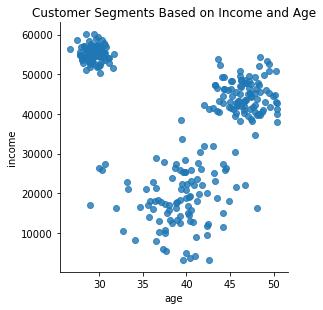

In [3]:
sn.lmplot( "age", "income", data=customers_df, fit_reg = False, size = 4 );
plt.title( "Customer Segments Based on Income and Age");

Three segmentsa are observed from the picture

  1. On the top-left of the graph, we have low age - high income group
  2. On the top-right of the graph, we have high age - medium income group
  3. On the bottom of the graph, we have low income group spread across all ages     ]

## <font color='Blue'>3.0 Normalizing Data</font>

In [4]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["age", "income"]] )
print(type(scaled_customers_df))
scaled_customers_df[0:10]
scaled_customers_df = scaled_customers_df.tolist()
type(scaled_customers_df)

<class 'numpy.ndarray'>


list

## <font color='Blue'>4.0 Executing Clustering</font>

Steps in executing Hierarchical clustering

   1. Decide the value of k
   2. Decide the distance type using parameter 'affinity' - “euclidean”, “manhattan”, “cosine”, or “precomputed”
   3. Decide the linkage type using parameter 'linkage' - “ward”, “complete”, “average”, “single”

In [5]:
# Agglomerative clustering - Customer Segment Example
# Default is euclidean distance and ward linkage
# You can try different distance combinations

clusters = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
clusters.fit(scaled_customers_df)
clusters.labels_

array([2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 0, 2,
       1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0,
       2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0,
       2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1,
       2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1,
       0, 0, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1,
       2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0,
       2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0], d

## <font color='Blue'>5.0 Assigning Cluster Lables</font>

In [6]:
customers_df["clusterid"] = clusters.labels_
customers_df[0:5]
cluster_size = customers_df.groupby(['clusterid']).size() 
print(cluster_size)

clusterid
0     99
1    100
2    101
dtype: int64


## <font color='Blue'>6.0 Validation</font>

### <font color='Blue'>6.1 Silhouttee Coefficient</font>

In [7]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(scaled_customers_df, clusters.labels_))
# Silhouette score between -1 and 1

Silhouette Coefficient: 0.738


### <font color='Blue'>6.2 Calinski-Harabasz index</font>

In [8]:
print("Calinski-Harabasz index: %0.3f"% metrics.calinski_harabasz_score(scaled_customers_df, clusters.labels_))

Calinski-Harabasz index: 1363.985


### <font color='Blue'>6.3 Plotting the Clusters</font>

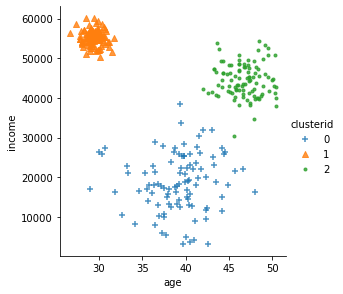

In [9]:
markers = ['+','^','.']
sn.lmplot( "age", "income",data=customers_df,hue = "clusterid",fit_reg=False,markers = markers,size = 4 );

### <font color='Blue'>7.0 Obtaining Cluster Centers</font>

In [10]:
result = customers_df.groupby('clusterid')['age','income'].agg( ["median",'std'] ).reset_index() 
result['cluster_size'] = cluster_size
result

clusterid     age             income              cluster_size
             median       std   median          std             
0         0  39.450  3.544055  18200.0  7275.489387           99
1         1  29.375  0.921458  55200.0  1951.943864          100
2         2  46.750  2.013104  44400.0  4214.529324          101

<b> Interpretation </b>

    Cluster A: Low Age (29) and High Income (55K)
    Cluster B: Mid Age (39) and Low Income  (18K)
    Cluster C: High Age (46) and Medium Income (43K)   

### <font color='Blue'>7.0 Dendrogram Approach</font>

In [11]:
import scipy.cluster.hierarchy as shc

1. use paramter p to set cluster at 2^(p+1)
2. method for linkage 
3. metric for distance measure. For available distances, see 'pdist' function
       see https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
       Not all combinations or method and metric are possible

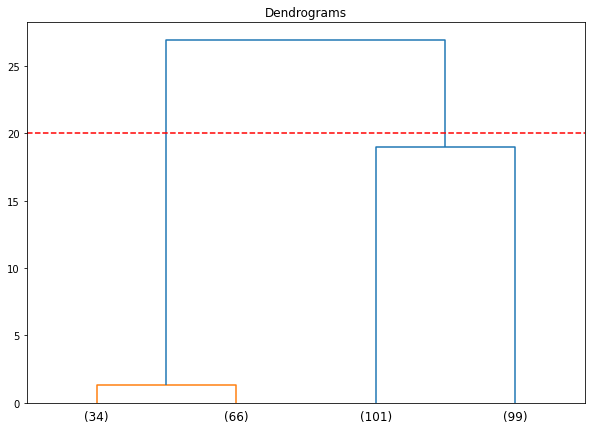

In [12]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_customers_df, method='ward',metric='euclidean'),p=1,truncate_mode='level')
plt.axhline(y=20, color='r', linestyle='--')

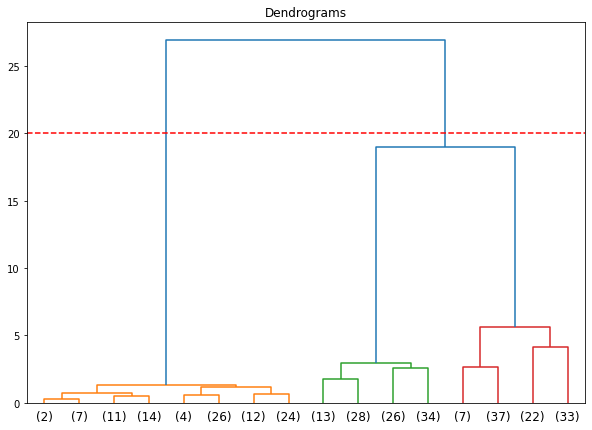

In [13]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_customers_df, method='ward',metric='euclidean'),p=3,truncate_mode='level')
plt.axhline(y=20, color='r', linestyle='--')